In [58]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Classification - Fashion MNIST

In [13]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [31]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 
               'Sneakers', 'Bag', 'Ankle boot']

In [32]:
X_train.shape

(55000, 28, 28)

Coat


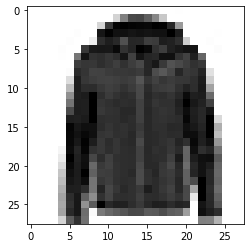

In [33]:
print(class_names[y_train[0]])
plt.imshow(X_train[0], cmap='binary');

In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.get_weights()

[array([[-0.04231605, -0.0349601 , -0.06844484, ..., -0.05330376,
          0.03134373, -0.0720479 ],
        [ 0.04030094, -0.00265555, -0.02427752, ..., -0.03197094,
         -0.04404435, -0.01043578],
        [-0.06215933, -0.01716026, -0.01916364, ...,  0.0625461 ,
         -0.00102974, -0.01948775],
        ...,
        [-0.06201993, -0.03224373,  0.04832414, ...,  0.03204634,
          0.04887621, -0.04802778],
        [ 0.02472623,  0.04221936, -0.00705812, ...,  0.01078632,
          0.02404517, -0.02756626],
        [-0.00310828, -0.07201134, -0.00791426, ...,  0.04247774,
          0.02383696, -0.03749859]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [36]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='nadam', 
              metrics=['accuracy'])

In [37]:
history = model.fit(X_train, y_train, epochs=10000,
                    validation_data=(X_valid, y_valid),
                    callbacks=[keras.callbacks.EarlyStopping(patience=15)])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10000
55000/55000 [==============================] - 11s 205us/sample - loss: 0.4705 - accuracy: 0.8303 - val_loss: 0.3942 - val_accuracy: 0.8546
Epoch 2/10000
55000/55000 [==============================] - 11s 195us/sample - loss: 0.3508 - accuracy: 0.8699 - val_loss: 0.3463 - val_accuracy: 0.8736
Epoch 3/10000
55000/55000 [==============================] - 11s 196us/sample - loss: 0.3143 - accuracy: 0.8838 - val_loss: 0.3562 - val_accuracy: 0.8724
Epoch 4/10000
55000/55000 [==============================] - 11s 195us/sample - loss: 0.2928 - accuracy: 0.8919 - val_loss: 0.3055 - val_accuracy: 0.8912
Epoch 5/10000
55000/55000 [==============================] - 11s 196us/sample - loss: 0.2751 - accuracy: 0.8974 - val_loss: 0.3148 - val_accuracy: 0.8776
Epoch 6/10000
55000/55000 [==============================] - 11s 194us/sample - loss: 0.2611 - accuracy: 0.9017 - val_loss: 0.3033 - val_accuracy: 0.8918
Epoch 7/10000
55000/55000 [

In [38]:
import pandas as pd

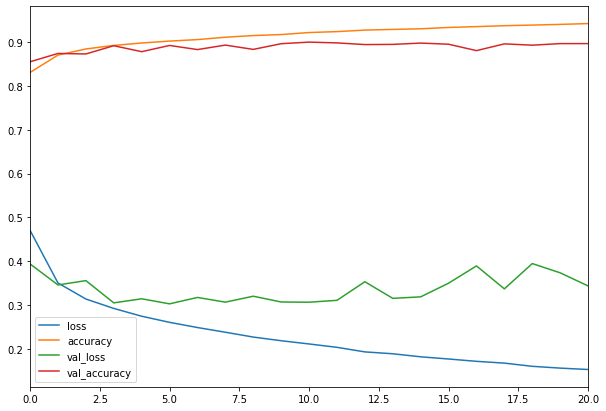

In [39]:
pd.DataFrame(history.history).plot(figsize=(10, 7));

In [40]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 69us/sample - loss: 68.3206 - accuracy: 0.8737


[68.32055840232336, 0.8737]

In [45]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [48]:
y_pred = model.predict_classes(X_new)
y_pred, [class_names[x] for x in y_pred]

(array([9, 2, 1]), ['Ankle boot', 'Pullover', 'Trousers'])

# Classification - MNIST

In [50]:
from sklearn.datasets import fetch_openml

In [59]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target'].astype(np.uint8)
X_train, X_valid, X_test = X[:50000] / 255.0, X[50000:60000] / 255.0, X[60000:] / 255.0
y_train, y_valid, y_test = y[:50000], y[50000:60000], y[60000:]

In [61]:
model = keras.Sequential([
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [62]:
model.fit(X_train, y_train, epochs=10000,
          validation_data=(X_valid, y_valid),
          callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10000
50000/50000 [==============================] - 11s 215us/sample - loss: 0.2185 - accuracy: 0.9345 - val_loss: 0.1063 - val_accuracy: 0.9681
Epoch 2/10000
50000/50000 [==============================] - 10s 203us/sample - loss: 0.0877 - accuracy: 0.9735 - val_loss: 0.0866 - val_accuracy: 0.9734
Epoch 3/10000
50000/50000 [==============================] - 10s 204us/sample - loss: 0.0589 - accuracy: 0.9810 - val_loss: 0.0850 - val_accuracy: 0.9743
Epoch 4/10000
50000/50000 [==============================] - 10s 203us/sample - loss: 0.0426 - accuracy: 0.9861 - val_loss: 0.0897 - val_accuracy: 0.9763
Epoch 5/10000
50000/50000 [==============================] - 10s 205us/sample - loss: 0.0335 - accuracy: 0.9894 - val_loss: 0.0871 - val_accuracy: 0.9757
Epoch 6/10000
50000/50000 [==============================] - 10s 205us/sample - loss: 0.0280 - accuracy: 0.9909 - val_loss: 0.0997 - val_accuracy: 0.9747
Epoch 7/10000
50000/50000 

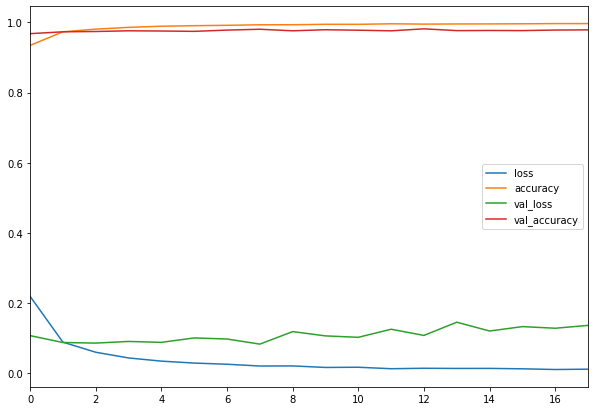

In [65]:
pd.DataFrame(model.history.history).plot(figsize=(10, 7));

In [67]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 64us/sample - loss: 0.1183 - accuracy: 0.9809


[0.11829665097946376, 0.9809]

# Custom Callbacks

In [72]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print(f"\nval/trian {logs['val_loss'] / logs['loss']}")

In [73]:
model = keras.Sequential([
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [74]:
model.fit(X_train, y_train, epochs=10000,
          validation_data=(X_valid, y_valid),
          callbacks=[keras.callbacks.EarlyStopping(patience=10),
                     PrintValTrainRatioCallback()])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10000
49824/50000 [============================>.] - ETA: 0s - loss: 0.2163 - accuracy: 0.9360
val/trian 0.5205386753156831
50000/50000 [==============================] - 11s 212us/sample - loss: 0.2160 - accuracy: 0.9361 - val_loss: 0.1124 - val_accuracy: 0.9661
Epoch 2/10000
49888/50000 [============================>.] - ETA: 0s - loss: 0.0895 - accuracy: 0.9726
val/trian 0.9743186004086393
50000/50000 [==============================] - 10s 199us/sample - loss: 0.0895 - accuracy: 0.9726 - val_loss: 0.0872 - val_accuracy: 0.9737
Epoch 3/10000
49888/50000 [============================>.] - ETA: 0s - loss: 0.0600 - accuracy: 0.9811
val/trian 1.4671190980306639
50000/50000 [==============================] - 10s 199us/sample - loss: 0.0599 - accuracy: 0.9812 - val_loss: 0.0879 - val_accuracy: 0.9763
Epoch 4/10000
49824/50000 [============================>.] - ETA: 0s - loss: 0.0448 - accuracy: 0.9856
val/trian 2.065752887661169
500

# Regression - California housing

In [76]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [78]:
X, y = fetch_california_housing(return_X_y=True)

In [81]:
pipe = Pipeline([
    ('std_scaler', StandardScaler())
])

In [85]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

X_train = pipe.fit_transform(X_train)
X_valid = pipe.transform(X_valid)
X_test = pipe.transform(X_test)

In [88]:
model = keras.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='nadam')

In [89]:
model.fit(X_train, y_train, epochs=10000, 
          validation_data=(X_valid, y_valid),
          callbacks=[keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True),
                     PrintValTrainRatioCallback()])

Train on 11610 samples, validate on 3870 samples
Epoch 1/10000
11296/11610 [============================>.] - ETA: 0s - loss: 1.4190
val/trian 0.4760054685459678
11610/11610 [==============================] - 1s 114us/sample - loss: 1.3969 - val_loss: 0.6649
Epoch 2/10000
11360/11610 [============================>.] - ETA: 0s - loss: 0.5816
val/trian 0.9123390275069773
11610/11610 [==============================] - 1s 66us/sample - loss: 0.5789 - val_loss: 0.5282
Epoch 3/10000
11264/11610 [============================>.] - ETA: 0s - loss: 0.4792
val/trian 0.9662231038149565
11610/11610 [==============================] - 1s 68us/sample - loss: 0.4818 - val_loss: 0.4655
Epoch 4/10000
10944/11610 [===========================>..] - ETA: 0s - loss: 0.4380
val/trian 0.9940947819163022
11610/11610 [==============================] - 1s 70us/sample - loss: 0.4376 - val_loss: 0.4350
Epoch 5/10000
11040/11610 [===========================>..] - ETA: 0s - loss: 0.4154
val/trian 1.0067924236140857
1

Epoch 40/10000
11360/11610 [============================>.] - ETA: 0s - loss: 0.3253
val/trian 1.0093698539531804
11610/11610 [==============================] - 1s 66us/sample - loss: 0.3251 - val_loss: 0.3281
Epoch 41/10000
11200/11610 [===========================>..] - ETA: 0s - loss: 0.3202
val/trian 1.0263299510435209
11610/11610 [==============================] - 1s 69us/sample - loss: 0.3228 - val_loss: 0.3313
Epoch 42/10000
11296/11610 [============================>.] - ETA: 0s - loss: 0.3210
val/trian 1.0093816664667539
11610/11610 [==============================] - 1s 67us/sample - loss: 0.3204 - val_loss: 0.3234
Epoch 43/10000
11520/11610 [============================>.] - ETA: 0s - loss: 0.3183
val/trian 1.016339808485378
11610/11610 [==============================] - 1s 67us/sample - loss: 0.3185 - val_loss: 0.3237
Epoch 44/10000
11456/11610 [============================>.] - ETA: 0s - loss: 0.3168
val/trian 1.0397265507919162
11610/11610 [==============================] - 

11168/11610 [===========================>..] - ETA: 0s - loss: 0.3024
val/trian 1.021632240892369
11610/11610 [==============================] - 1s 67us/sample - loss: 0.2991 - val_loss: 0.3055
Epoch 80/10000
11040/11610 [===========================>..] - ETA: 0s - loss: 0.2941
val/trian 1.0381041711571877
11610/11610 [==============================] - 1s 69us/sample - loss: 0.2954 - val_loss: 0.3066
Epoch 81/10000
11072/11610 [===========================>..] - ETA: 0s - loss: 0.2986
val/trian 1.0413237711268277
11610/11610 [==============================] - 1s 68us/sample - loss: 0.2968 - val_loss: 0.3090
Epoch 82/10000
11328/11610 [============================>.] - ETA: 0s - loss: 0.2987
val/trian 1.0386647246878995
11610/11610 [==============================] - 1s 68us/sample - loss: 0.2977 - val_loss: 0.3092
Epoch 83/10000
11264/11610 [============================>.] - ETA: 0s - loss: 0.2989
val/trian 1.01745676082557
11610/11610 [==============================] - 1s 67us/sample - 

11040/11610 [===========================>..] - ETA: 0s - loss: 0.2892
val/trian 1.0416099397130891
11610/11610 [==============================] - 1s 70us/sample - loss: 0.2901 - val_loss: 0.3022
Epoch 119/10000
11136/11610 [===========================>..] - ETA: 0s - loss: 0.2851
val/trian 1.041418544266525
11610/11610 [==============================] - 1s 69us/sample - loss: 0.2867 - val_loss: 0.2986
Epoch 120/10000
11232/11610 [============================>.] - ETA: 0s - loss: 0.2902
val/trian 1.0335650621913446
11610/11610 [==============================] - 1s 67us/sample - loss: 0.2904 - val_loss: 0.3001
Epoch 121/10000
10944/11610 [===========================>..] - ETA: 0s - loss: 0.2842
val/trian 1.0659597179361662
11610/11610 [==============================] - 1s 70us/sample - loss: 0.2870 - val_loss: 0.3059
Epoch 122/10000
11200/11610 [===========================>..] - ETA: 0s - loss: 0.2904
val/trian 1.0480775273407523
11610/11610 [==============================] - 1s 68us/sam

Epoch 157/10000
11104/11610 [===========================>..] - ETA: 0s - loss: 0.2851
val/trian 1.0431480842438792
11610/11610 [==============================] - 1s 68us/sample - loss: 0.2858 - val_loss: 0.2981
Epoch 158/10000
10976/11610 [===========================>..] - ETA: 0s - loss: 0.2887
val/trian 1.051067980247514
11610/11610 [==============================] - 1s 69us/sample - loss: 0.2873 - val_loss: 0.3020


In [90]:
model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 29us/sample - loss: 0.3161


0.3161145052937574

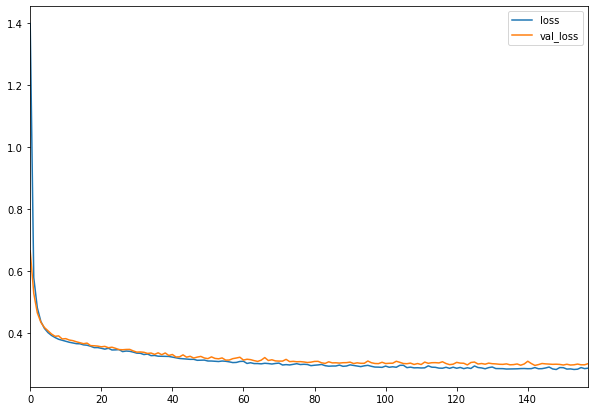

In [92]:
pd.DataFrame(model.history.history).plot(figsize=(10, 7));

In [94]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred, y_test[:3]

(array([[2.4299262],
        [4.3882833],
        [2.1958513]], dtype=float32), array([2.004, 3.97 , 1.964]))

# Tuning ANN hyperparameters - sklearn grid search

In [116]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [119]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [120]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.0048041052445756145, n_hidden=0, n_neurons=9 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


7740/7740 [==============================] - 1s 92us/sample - loss: 1.9140 - val_loss: 0.7491
Epoch 2/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.6823 - val_loss: 0.6428
Epoch 3/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.6328 - val_loss: 0.6227
Epoch 4/100
7740/7740 [==============================] - 1s 92us/sample - loss: 0.6104 - val_loss: 0.6005
Epoch 5/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.6425 - val_loss: 0.6817
Epoch 6/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.7543 - val_loss: 0.9062
Epoch 7/100
7740/7740 [==============================] - 0s 62us/sample - loss: 1.3794 - val_loss: 2.0011
Epoch 8/100
7740/7740 [==============================] - 0s 62us/sample - loss: 3.5236 - val_loss: 5.8277
Epoch 9/100
7740/7740 [==============================] - 0s 64us/sample - loss: 12.3551 - val_loss: 20.6580
Epoch 10/100
7740/7740 [==============================] 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.4s remaining:    0.0s


7740/7740 [==============================] - 1s 87us/sample - loss: 2.6047 - val_loss: 1.1097
Epoch 2/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.9809 - val_loss: 0.9996
Epoch 3/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.9843 - val_loss: 0.9968
Epoch 4/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.9175 - val_loss: 0.9351
Epoch 5/100
7740/7740 [==============================] - 0s 61us/sample - loss: 1.9113 - val_loss: 0.9552
Epoch 6/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.8907 - val_loss: 0.9279
Epoch 7/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.8980 - val_loss: 0.9247
Epoch 8/100
7740/7740 [==============================] - 0s 62us/sample - loss: 1.8723 - val_loss: 0.8957
Epoch 9/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.8781 - val_loss: 0.8984
Epoch 10/100
7740/7740 [==============================] - 

Epoch 15/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4802 - val_loss: 0.4834
Epoch 16/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4749 - val_loss: 0.4790
Epoch 17/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4694 - val_loss: 0.4743
Epoch 18/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4670 - val_loss: 0.4710
Epoch 19/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4616 - val_loss: 0.4665
Epoch 20/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4592 - val_loss: 0.4655
Epoch 21/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4557 - val_loss: 0.4617
Epoch 22/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4570 - val_loss: 0.4633
Epoch 23/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4537 - val_loss: 0.4582
Epoch 24/100
7740/7740 [=============

7740/7740 [==============================] - 1s 67us/sample - loss: 0.3789 - val_loss: 0.3978
Epoch 92/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.3781 - val_loss: 0.3975
Epoch 93/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3778 - val_loss: 0.3960
Epoch 94/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.3773 - val_loss: 0.3960
Epoch 95/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.3765 - val_loss: 0.3959
Epoch 96/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.3759 - val_loss: 0.3954
Epoch 97/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3754 - val_loss: 0.3953
Epoch 98/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.3750 - val_loss: 0.3942
Epoch 99/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.3745 - val_loss: 0.3939
Epoch 100/100
3870/3870 [=========================

7740/7740 [==============================] - 1s 70us/sample - loss: 0.4136 - val_loss: 0.4177
Epoch 66/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4128 - val_loss: 0.4173
Epoch 67/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.4124 - val_loss: 0.4166
Epoch 68/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4116 - val_loss: 0.4153
Epoch 69/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.4112 - val_loss: 0.4145
Epoch 70/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4104 - val_loss: 0.4141
Epoch 71/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4097 - val_loss: 0.4137
Epoch 72/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4093 - val_loss: 0.4137
Epoch 73/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4084 - val_loss: 0.4127
Epoch 74/100
7740/7740 [==========================

7740/7740 [==============================] - 1s 65us/sample - loss: 0.4439 - val_loss: 0.4488
Epoch 40/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4426 - val_loss: 0.4474
Epoch 41/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4413 - val_loss: 0.4464
Epoch 42/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4400 - val_loss: 0.4451
Epoch 43/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.4387 - val_loss: 0.4439
Epoch 44/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4373 - val_loss: 0.4426
Epoch 45/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4359 - val_loss: 0.4412
Epoch 46/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4348 - val_loss: 0.4403
Epoch 47/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4331 - val_loss: 0.4395
Epoch 48/100
7740/7740 [==========================

7740/7740 [==============================] - 1s 72us/sample - loss: 1.3584 - val_loss: 1.2657
Epoch 14/100
7740/7740 [==============================] - 1s 73us/sample - loss: 1.3584 - val_loss: 1.2657
Epoch 15/100
7740/7740 [==============================] - 1s 74us/sample - loss: 1.3584 - val_loss: 1.2657
Epoch 16/100
7740/7740 [==============================] - 1s 73us/sample - loss: 1.3584 - val_loss: 1.2657
Epoch 17/100
3870/3870 [==============================] - 0s 31us/sample - loss: 1.3082
[CV]  learning_rate=0.0014614453041823787, n_hidden=3, n_neurons=2, total=  10.0s
[CV] learning_rate=0.0014614453041823787, n_hidden=3, n_neurons=2 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 104us/sample - loss: 3.6588 - val_loss: 2.2532
Epoch 2/100
7740/7740 [==============================] - 1s 73us/sample - loss: 1.9001 - val_loss: 1.4881
Epoch 3/100
7740/7740 [==============================] - 1s 72us/sample - loss: 1.4

7740/7740 [==============================] - 1s 75us/sample - loss: 0.4658 - val_loss: 0.4706
Epoch 52/100
7740/7740 [==============================] - 1s 74us/sample - loss: 0.4652 - val_loss: 0.4696
Epoch 53/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.4639 - val_loss: 0.4695
Epoch 54/100
7740/7740 [==============================] - 1s 74us/sample - loss: 0.4626 - val_loss: 0.4691
Epoch 55/100
7740/7740 [==============================] - 1s 75us/sample - loss: 0.4623 - val_loss: 0.4670
Epoch 56/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.4614 - val_loss: 0.4668
Epoch 57/100
7740/7740 [==============================] - 1s 73us/sample - loss: 0.4606 - val_loss: 0.4654
Epoch 58/100
7740/7740 [==============================] - 1s 74us/sample - loss: 0.4594 - val_loss: 0.4640
Epoch 59/100
7740/7740 [==============================] - 1s 73us/sample - loss: 0.4586 - val_loss: 0.4623
Epoch 60/100
7740/7740 [==========================

7740/7740 [==============================] - 1s 67us/sample - loss: 0.4591 - val_loss: 0.4622
Epoch 13/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4576 - val_loss: 0.4602
Epoch 14/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4539 - val_loss: 0.4552
Epoch 15/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4514 - val_loss: 0.4571
Epoch 16/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4475 - val_loss: 0.4502
Epoch 17/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4442 - val_loss: 0.4512
Epoch 18/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4406 - val_loss: 0.4428
Epoch 19/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4373 - val_loss: 0.4445
Epoch 20/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4338 - val_loss: 0.4364
Epoch 21/100
7740/7740 [==========================

7740/7740 [==============================] - 1s 66us/sample - loss: 0.4391 - val_loss: 0.4544
Epoch 10/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4359 - val_loss: 0.4620
Epoch 11/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4329 - val_loss: 0.4393
Epoch 12/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4313 - val_loss: 0.4287
Epoch 13/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4270 - val_loss: 0.4290
Epoch 14/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4253 - val_loss: 0.4278
Epoch 15/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4244 - val_loss: 0.4232
Epoch 16/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4221 - val_loss: 0.4192
Epoch 17/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4200 - val_loss: 0.4334
Epoch 18/100
7740/7740 [==========================

7740/7740 [==============================] - 1s 65us/sample - loss: 0.3838 - val_loss: 0.3928
Epoch 86/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.3823 - val_loss: 0.3846
Epoch 87/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.3815 - val_loss: 0.3864
Epoch 88/100
3870/3870 [==============================] - 0s 30us/sample - loss: 0.3890
[CV]  learning_rate=0.013205529067164243, n_hidden=1, n_neurons=4, total=  44.7s
[CV] learning_rate=0.005498448400786033, n_hidden=2, n_neurons=16 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 100us/sample - loss: 1.6824 - val_loss: 0.7988
Epoch 2/100
7740/7740 [==============================] - 1s 71us/sample - loss: 0.8364 - val_loss: 0.7131
Epoch 3/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.6921 - val_loss: 0.6433
Epoch 4/100
7740/7740 [==============================] - 1s 70us/sample - loss: 0.618

7740/7740 [==============================] - 1s 71us/sample - loss: 0.3228 - val_loss: 0.3376
Epoch 72/100
7740/7740 [==============================] - 1s 72us/sample - loss: 0.3220 - val_loss: 0.3400
Epoch 73/100
7740/7740 [==============================] - 1s 71us/sample - loss: 0.3209 - val_loss: 0.3414
Epoch 74/100
7740/7740 [==============================] - 1s 73us/sample - loss: 0.3201 - val_loss: 0.3315
Epoch 75/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.3195 - val_loss: 0.3324
Epoch 76/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.3195 - val_loss: 0.3364
Epoch 77/100
7740/7740 [==============================] - 1s 70us/sample - loss: 0.3195 - val_loss: 0.3318
Epoch 78/100
7740/7740 [==============================] - 1s 72us/sample - loss: 0.3175 - val_loss: 0.3324
Epoch 79/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.3178 - val_loss: 0.3357
Epoch 80/100
7740/7740 [==========================

7740/7740 [==============================] - 1s 72us/sample - loss: 0.3466 - val_loss: 0.3600
Epoch 46/100
7740/7740 [==============================] - 1s 71us/sample - loss: 0.3457 - val_loss: 0.3554
Epoch 47/100
7740/7740 [==============================] - 1s 72us/sample - loss: 0.3449 - val_loss: 0.3567
Epoch 48/100
7740/7740 [==============================] - 1s 70us/sample - loss: 0.3447 - val_loss: 0.3551
Epoch 49/100
7740/7740 [==============================] - 1s 71us/sample - loss: 0.3440 - val_loss: 0.3571
Epoch 50/100
7740/7740 [==============================] - 1s 70us/sample - loss: 0.3435 - val_loss: 0.3573
Epoch 51/100
7740/7740 [==============================] - 1s 72us/sample - loss: 0.3427 - val_loss: 0.3533
Epoch 52/100
7740/7740 [==============================] - 1s 71us/sample - loss: 0.3416 - val_loss: 0.3561
Epoch 53/100
7740/7740 [==============================] - 1s 72us/sample - loss: 0.3407 - val_loss: 0.3559
Epoch 54/100
7740/7740 [==========================

7740/7740 [==============================] - 1s 70us/sample - loss: 0.3927 - val_loss: 0.4000
Epoch 20/100
7740/7740 [==============================] - 1s 72us/sample - loss: 0.3875 - val_loss: 0.4016
Epoch 21/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.3865 - val_loss: 0.3980
Epoch 22/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.3839 - val_loss: 0.3957
Epoch 23/100
7740/7740 [==============================] - 1s 70us/sample - loss: 0.3808 - val_loss: 0.3965
Epoch 24/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.3788 - val_loss: 0.3907
Epoch 25/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.3756 - val_loss: 0.3922
Epoch 26/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.3742 - val_loss: 0.3872
Epoch 27/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.3725 - val_loss: 0.3871
Epoch 28/100
7740/7740 [==========================

7740/7740 [==============================] - 1s 69us/sample - loss: 0.3237 - val_loss: 0.3452
Epoch 96/100
7740/7740 [==============================] - 1s 70us/sample - loss: 0.3218 - val_loss: 0.3534
Epoch 97/100
7740/7740 [==============================] - 1s 72us/sample - loss: 0.3232 - val_loss: 0.3464
Epoch 98/100
7740/7740 [==============================] - 1s 70us/sample - loss: 0.3233 - val_loss: 0.3472
Epoch 99/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.3235 - val_loss: 0.3462
Epoch 100/100
3870/3870 [==============================] - 0s 36us/sample - loss: 0.3657
[CV]  learning_rate=0.005498448400786033, n_hidden=2, n_neurons=16, total=  53.7s
[CV] learning_rate=0.0017350102969173717, n_hidden=1, n_neurons=18 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 95us/sample - loss: 1.8123 - val_loss: 0.9856
Epoch 2/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.

7740/7740 [==============================] - 1s 66us/sample - loss: 0.4024 - val_loss: 0.4185
Epoch 70/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4019 - val_loss: 0.4175
Epoch 71/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.4010 - val_loss: 0.4171
Epoch 72/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4005 - val_loss: 0.4162
Epoch 73/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4000 - val_loss: 0.4158
Epoch 74/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3991 - val_loss: 0.4162
Epoch 75/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3991 - val_loss: 0.4151
Epoch 76/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.3982 - val_loss: 0.4142
Epoch 77/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3977 - val_loss: 0.4142
Epoch 78/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 63us/sample - loss: 0.4426 - val_loss: 0.4423
Epoch 44/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.4400 - val_loss: 0.4432
Epoch 45/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4393 - val_loss: 0.4409
Epoch 46/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4395 - val_loss: 0.4432
Epoch 47/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4398 - val_loss: 0.4401
Epoch 48/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4387 - val_loss: 0.4422
Epoch 49/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4387 - val_loss: 0.4387
Epoch 50/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4377 - val_loss: 0.4416
Epoch 51/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4370 - val_loss: 0.4367
Epoch 52/100
7740/7740 [==========================

7740/7740 [==============================] - 1s 66us/sample - loss: 0.4946 - val_loss: 0.4945
Epoch 18/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4885 - val_loss: 0.4894
Epoch 19/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.4829 - val_loss: 0.4847
Epoch 20/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4778 - val_loss: 0.4801
Epoch 21/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4736 - val_loss: 0.4764
Epoch 22/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4695 - val_loss: 0.4732
Epoch 23/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4657 - val_loss: 0.4708
Epoch 24/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4630 - val_loss: 0.4683
Epoch 25/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4602 - val_loss: 0.4664
Epoch 26/100
7740/7740 [==========================

7740/7740 [==============================] - 1s 67us/sample - loss: 0.3885 - val_loss: 0.4034
Epoch 94/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.3880 - val_loss: 0.4035
Epoch 95/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.3876 - val_loss: 0.4025
Epoch 96/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.3869 - val_loss: 0.4021
Epoch 97/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.3865 - val_loss: 0.4013
Epoch 98/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.3859 - val_loss: 0.4007
Epoch 99/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3854 - val_loss: 0.4006
Epoch 100/100
3870/3870 [==============================] - 0s 31us/sample - loss: 0.4001
[CV]  learning_rate=0.0017350102969173717, n_hidden=1, n_neurons=18, total=  51.5s
[CV] learning_rate=0.01141416132433509, n_hidden=0, n_neurons=4 ......
Train on 7740 samples

7740/7740 [==============================] - 0s 61us/sample - loss: 1.0086 - val_loss: 0.9591
Epoch 10/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.9161 - val_loss: 0.8839
Epoch 11/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.8507 - val_loss: 0.8298
Epoch 12/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.8037 - val_loss: 0.7903
Epoch 13/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.7693 - val_loss: 0.7607
Epoch 14/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.7436 - val_loss: 0.7382
Epoch 15/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.7239 - val_loss: 0.7205
Epoch 16/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.7084 - val_loss: 0.7063
Epoch 17/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.6959 - val_loss: 0.6946
Epoch 18/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 63us/sample - loss: 0.5278 - val_loss: 0.5303
Epoch 86/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.5273 - val_loss: 0.5298
Epoch 87/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.5268 - val_loss: 0.5294
Epoch 88/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.5263 - val_loss: 0.5290
Epoch 89/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.5259 - val_loss: 0.5285
Epoch 90/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.5254 - val_loss: 0.5281
Epoch 91/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.5250 - val_loss: 0.5278
Epoch 92/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.5246 - val_loss: 0.5274
Epoch 93/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.5242 - val_loss: 0.5270
Epoch 94/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 63us/sample - loss: 0.5339 - val_loss: 0.5311
Epoch 60/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.5334 - val_loss: 0.5307
Epoch 61/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.5329 - val_loss: 0.5302
Epoch 62/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.5324 - val_loss: 0.5299
Epoch 63/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.5319 - val_loss: 0.5295
Epoch 64/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.5314 - val_loss: 0.5291
Epoch 65/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.5310 - val_loss: 0.5288
Epoch 66/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.5305 - val_loss: 0.5285
Epoch 67/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.5301 - val_loss: 0.5282
Epoch 68/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 64us/sample - loss: 0.5720 - val_loss: 0.5748
Epoch 34/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.5705 - val_loss: 0.5732
Epoch 35/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.5690 - val_loss: 0.5717
Epoch 36/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.5676 - val_loss: 0.5702
Epoch 37/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.5662 - val_loss: 0.5688
Epoch 38/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.5648 - val_loss: 0.5675
Epoch 39/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.5635 - val_loss: 0.5662
Epoch 40/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.5622 - val_loss: 0.5649
Epoch 41/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.5610 - val_loss: 0.5636
Epoch 42/100
7740/7740 [==========================

7740/7740 [==============================] - 1s 66us/sample - loss: 0.6657 - val_loss: 0.6799
Epoch 8/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.6473 - val_loss: 0.6626
Epoch 9/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.6319 - val_loss: 0.6478
Epoch 10/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.6185 - val_loss: 0.6348
Epoch 11/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.6067 - val_loss: 0.6231
Epoch 12/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.5961 - val_loss: 0.6124
Epoch 13/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.5865 - val_loss: 0.6027
Epoch 14/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.5777 - val_loss: 0.5937
Epoch 15/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.5695 - val_loss: 0.5855
Epoch 16/100
7740/7740 [============================

7740/7740 [==============================] - 1s 65us/sample - loss: 0.4364 - val_loss: 0.4454
Epoch 84/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4358 - val_loss: 0.4446
Epoch 85/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.4352 - val_loss: 0.4441
Epoch 86/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.4345 - val_loss: 0.4435
Epoch 87/100
7740/7740 [==============================] - 0s 65us/sample - loss: 0.4340 - val_loss: 0.4428
Epoch 88/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.4335 - val_loss: 0.4423
Epoch 89/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4328 - val_loss: 0.4419
Epoch 90/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4323 - val_loss: 0.4413
Epoch 91/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4317 - val_loss: 0.4409
Epoch 92/100
7740/7740 [==========================

7740/7740 [==============================] - 1s 68us/sample - loss: 0.4505 - val_loss: 0.4517
Epoch 58/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4496 - val_loss: 0.4510
Epoch 59/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4485 - val_loss: 0.4501
Epoch 60/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4479 - val_loss: 0.4495
Epoch 61/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4471 - val_loss: 0.4490
Epoch 62/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4463 - val_loss: 0.4478
Epoch 63/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4455 - val_loss: 0.4472
Epoch 64/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4448 - val_loss: 0.4462
Epoch 65/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4440 - val_loss: 0.4456
Epoch 66/100
7740/7740 [==========================

7740/7740 [==============================] - 1s 67us/sample - loss: 0.4846 - val_loss: 0.4900
Epoch 32/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4824 - val_loss: 0.4880
Epoch 33/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4802 - val_loss: 0.4861
Epoch 34/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4782 - val_loss: 0.4843
Epoch 35/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.4763 - val_loss: 0.4827
Epoch 36/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4746 - val_loss: 0.4811
Epoch 37/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.4729 - val_loss: 0.4797
Epoch 38/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4714 - val_loss: 0.4783
Epoch 39/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4700 - val_loss: 0.4770
Epoch 40/100
7740/7740 [==========================

7740/7740 [==============================] - 1s 65us/sample - loss: 0.5214 - val_loss: 0.5133
Epoch 6/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4921 - val_loss: 0.4909
Epoch 7/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4724 - val_loss: 0.4772
Epoch 8/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4590 - val_loss: 0.4640
Epoch 9/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4496 - val_loss: 0.4553
Epoch 10/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4403 - val_loss: 0.4482
Epoch 11/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.4328 - val_loss: 0.4397
Epoch 12/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.4255 - val_loss: 0.4349
Epoch 13/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4190 - val_loss: 0.4256
Epoch 14/100
7740/7740 [==============================

7740/7740 [==============================] - 1s 66us/sample - loss: 0.3418 - val_loss: 0.3560
Epoch 82/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.3410 - val_loss: 0.3892
Epoch 83/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.3417 - val_loss: 0.3702
Epoch 84/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.3412 - val_loss: 0.3543
Epoch 85/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.3401 - val_loss: 0.3552
Epoch 86/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.3399 - val_loss: 0.3589
Epoch 87/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.3405 - val_loss: 0.3588
Epoch 88/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.3392 - val_loss: 0.3562
Epoch 89/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.3380 - val_loss: 0.3604
Epoch 90/100
7740/7740 [==========================

7740/7740 [==============================] - 1s 65us/sample - loss: 0.3816 - val_loss: 0.3851
Epoch 56/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.3803 - val_loss: 0.3839
Epoch 57/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.3788 - val_loss: 0.3846
Epoch 58/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.3782 - val_loss: 0.3819
Epoch 59/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3775 - val_loss: 0.3864
Epoch 60/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.3774 - val_loss: 0.3833
Epoch 61/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3766 - val_loss: 0.3824
Epoch 62/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.3755 - val_loss: 0.3821
Epoch 63/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3755 - val_loss: 0.3804
Epoch 64/100
7740/7740 [==========================

7740/7740 [==============================] - 1s 68us/sample - loss: 0.4015 - val_loss: 0.4157
Epoch 30/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4001 - val_loss: 0.4132
Epoch 31/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.3989 - val_loss: 0.4106
Epoch 32/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3976 - val_loss: 0.4087
Epoch 33/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3959 - val_loss: 0.4094
Epoch 34/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3940 - val_loss: 0.4102
Epoch 35/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.3935 - val_loss: 0.4080
Epoch 36/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.3917 - val_loss: 0.4064
Epoch 37/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.3908 - val_loss: 0.4028
Epoch 38/100
7740/7740 [==========================

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 19.2min finished


RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f256c972c90>, as the constructor either does not set or modifies parameter learning_rate